In [1]:
# 1. Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Read the CSV file into a Pandas DataFrame
df = pd.read_csv("output/car_plate_data.csv")
print(df.head())

     Plate                           Organization Registration Number  \
0  10AA001  "MEQA SIĞORTA" AÇIQ SƏHMDAR CƏMİYYƏTİ             10AA001   
1  10AA002                                    NaN                 NaN   
2  10AA003  "MEQA SIĞORTA" AÇIQ SƏHMDAR CƏMİYYƏTİ             10AA003   
3  10AA004  "PAŞA SIĞORTA" AÇIQ SƏHMDAR CƏMİYYƏTİ             10AA004   
4  10AA005    "ATASIĞORTA" AÇIQ SƏHMDAR CƏMİYYƏTİ             10AA005   

           Marka        Model           Status    Error  
0  MERCEDES BENZ         S600       Qüvvədədir      NaN  
1            NaN          NaN              NaN  Timeout  
2  MERCEDES BENZ        S600L       Qüvvədədir      NaN  
3  MERCEDES BENZ  S580 4MATİC       Qüvvədədir      NaN  
4  MERCEDES BENZ      GLS 450  Qüvvəyə minəcək      NaN  


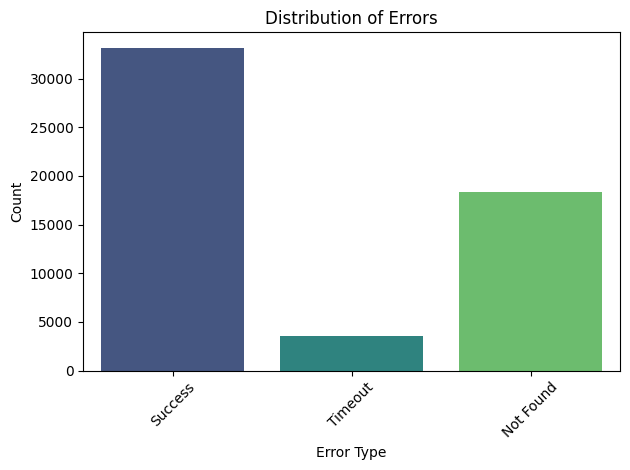

In [3]:
# 3. Plot the distribution of errors
# Fill null values with "Success" for better visualization
error_values = df["Error"].fillna("Success")

# Create the countplot with seaborn
sns.countplot(x=error_values, hue=error_values, palette="viridis", legend=False)
plt.title("Distribution of Errors")
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

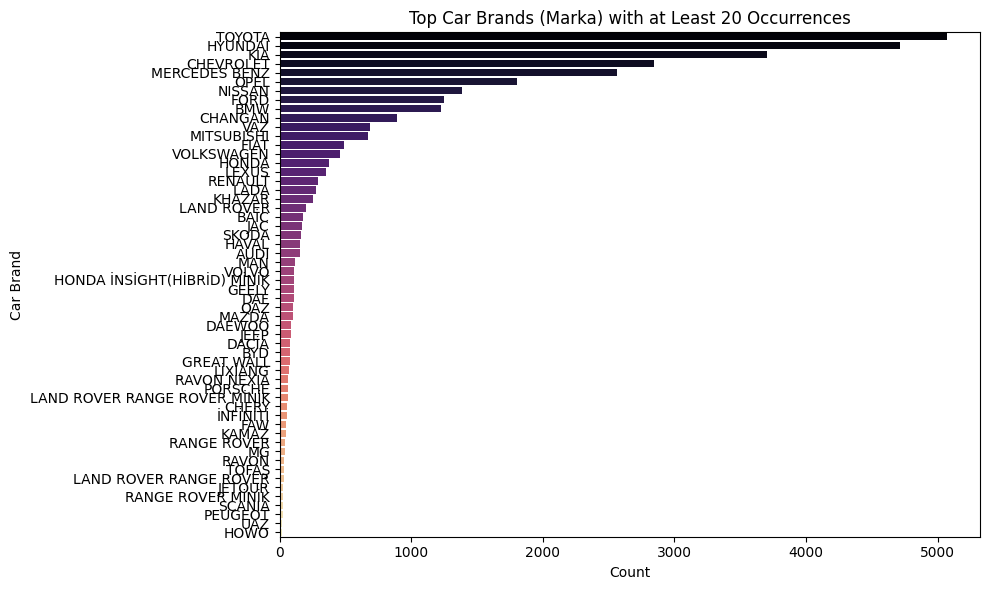

In [4]:
# 4. Chart 2: Distribution of Car Brands (Marka)
plt.figure(figsize=(10, 6))

# Get the value counts for the 'Marka' column
marka_counts = df["Marka"].value_counts().reset_index()
marka_counts.columns = ["Marka", "counts"]

# Filter the DataFrame to include only brands with at least 20 occurrences
marka_counts_filtered = marka_counts[marka_counts["counts"] >= 20]

# Plot the filtered data
sns.barplot(x=marka_counts_filtered["counts"], y=marka_counts_filtered["Marka"], 
            hue="Marka", data=marka_counts_filtered, palette="magma", legend=False)
plt.title("Top Car Brands (Marka) with at Least 20 Occurrences")
plt.xlabel("Count")
plt.ylabel("Car Brand")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

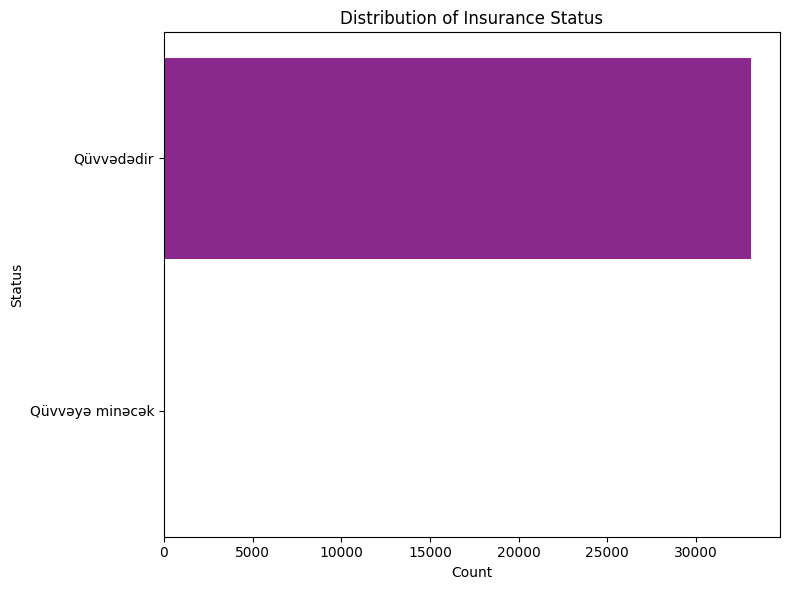

In [5]:
# 5. Chart 3: Distribution of Insurance Status
plt.figure(figsize=(8, 6))

# Filter rows where "Status" is not null
status_counts = df[df["Status"].notnull()]["Status"].value_counts().reset_index()
status_counts.columns = ["Status", "counts"]

# Plot the distribution of insurance status
sns.barplot(x=status_counts["counts"], y=status_counts["Status"], hue="Status", data=status_counts, palette="plasma", legend=False)
plt.title("Distribution of Insurance Status")
plt.xlabel("Count")
plt.ylabel("Status")
plt.tight_layout()
plt.show()

/tmp/ipykernel_876383/519150857.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_models["counts"], y=top_10_models["Model"], palette="rocket")


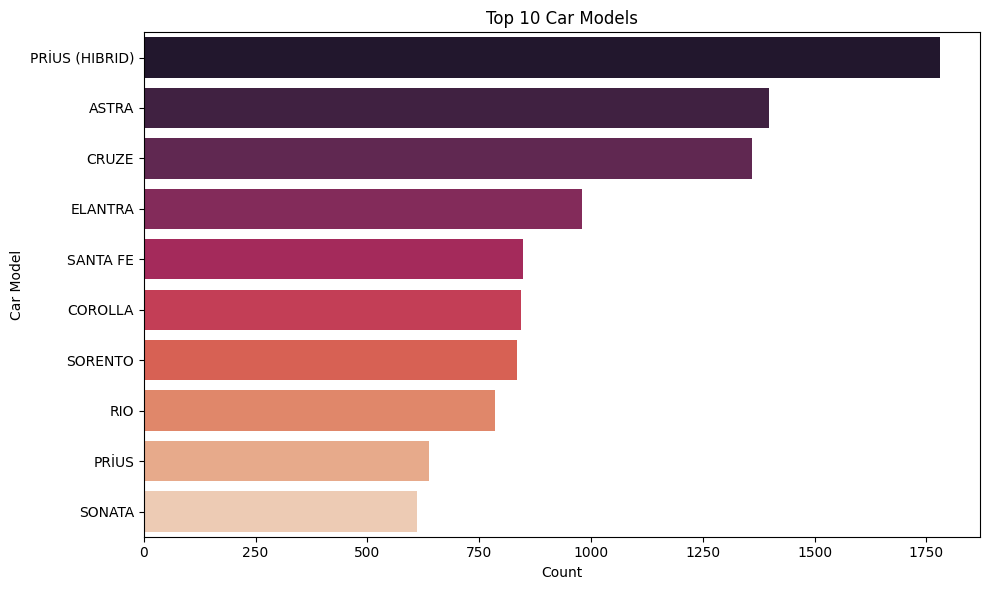

In [6]:
# 6. Chart 4: Top 10 Car Models
plt.figure(figsize=(10, 6))

# Filter rows where "Model" is not null and get the top 10 models
model_counts = df[df["Model"].notnull()]["Model"].value_counts().reset_index()
model_counts.columns = ["Model", "counts"]
top_10_models = model_counts.head(10)

# Plot the top 10 car models
sns.barplot(x=top_10_models["counts"], y=top_10_models["Model"], palette="rocket")
plt.title("Top 10 Car Models")
plt.xlabel("Count")
plt.ylabel("Car Model")
plt.tight_layout()
plt.show()

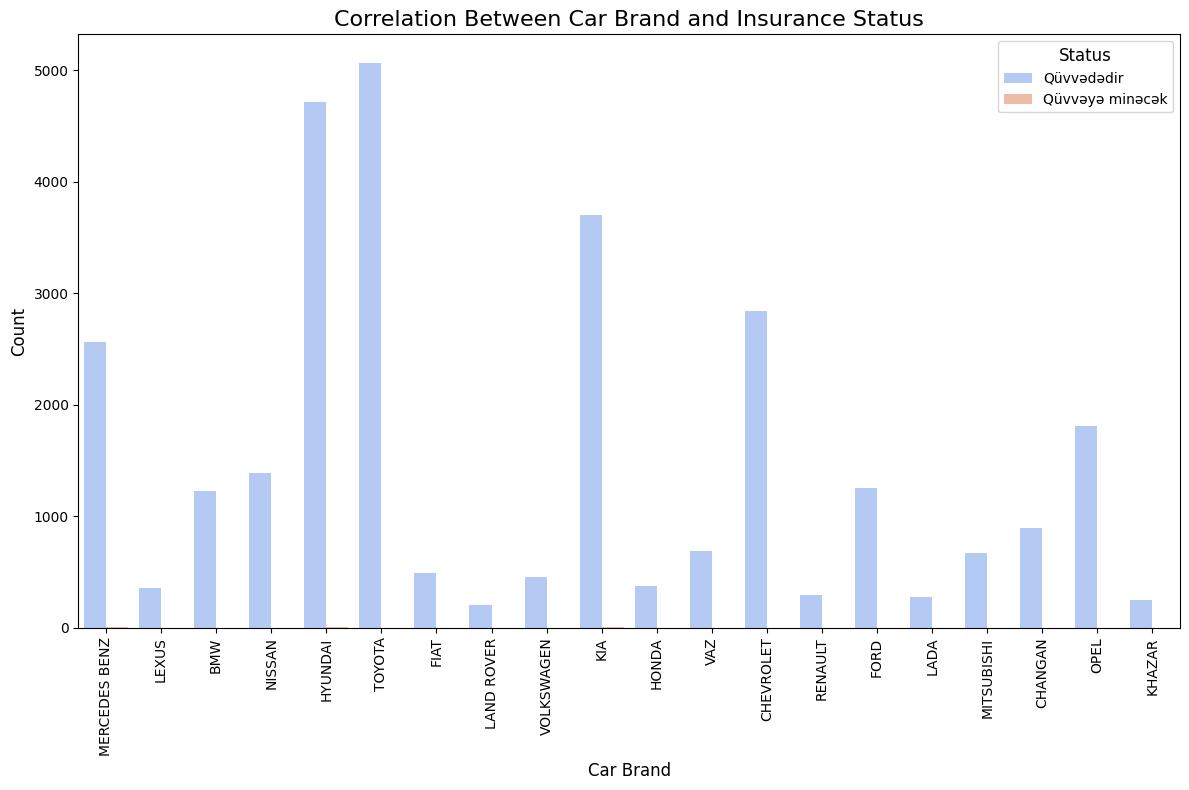

In [7]:
# 7. Chart 5: Correlation Between Car Brand and Insurance Status
plt.figure(figsize=(12, 8))  # Increase the figure size

# Filter rows where both "Marka" and "Status" are not null
filtered_df = df[df["Marka"].notnull() & df["Status"].notnull()]

# Get the top N car brands based on total counts (adjust N as needed)
top_n_brands = filtered_df["Marka"].value_counts().head(20).index  # Top 10 car brands
filtered_df_top = filtered_df[filtered_df["Marka"].isin(top_n_brands)]

# Plot the correlation between car brand and insurance status
sns.countplot(data=filtered_df_top, x="Marka", hue="Status", palette="coolwarm")
plt.title("Correlation Between Car Brand and Insurance Status", fontsize=16)
plt.xlabel("Car Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend with custom labels
plt.legend(title="Status", title_fontsize=12, fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

/tmp/ipykernel_876383/1244162631.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts["counts"], y=company_counts["InsuranceCompany"], palette="viridis")


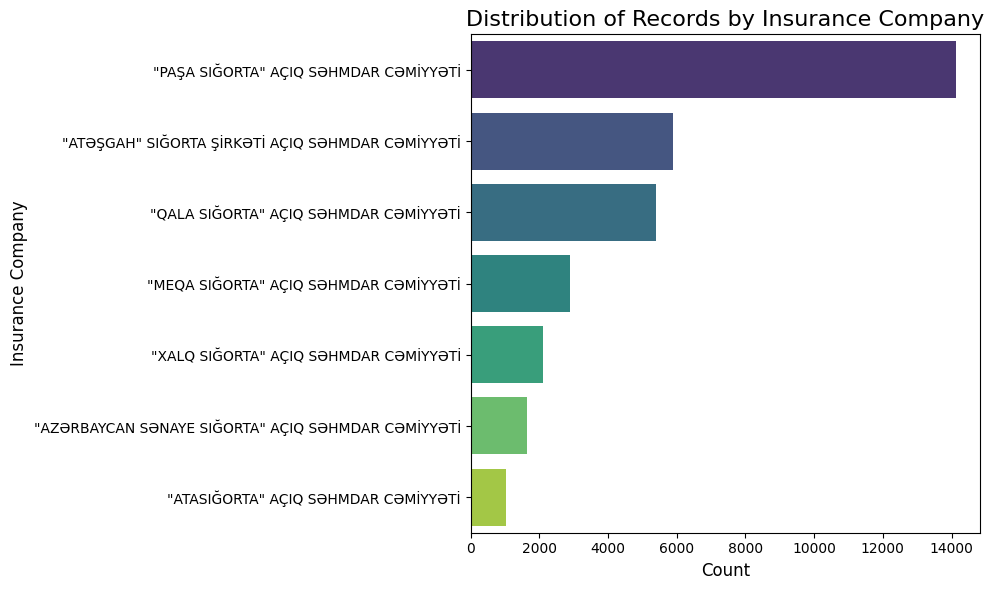

In [8]:
# 8. Chart 6: Distribution of Records by Insurance Company 

plt.figure(figsize=(10, 6))

# Count occurrences of each insurance company
company_counts = df["Organization"].value_counts().reset_index()
company_counts.columns = ["InsuranceCompany", "counts"]

# Plot the distribution
sns.barplot(x=company_counts["counts"], y=company_counts["InsuranceCompany"], palette="viridis")
plt.title("Distribution of Records by Insurance Company", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Insurance Company", fontsize=12)
plt.tight_layout()
plt.show()

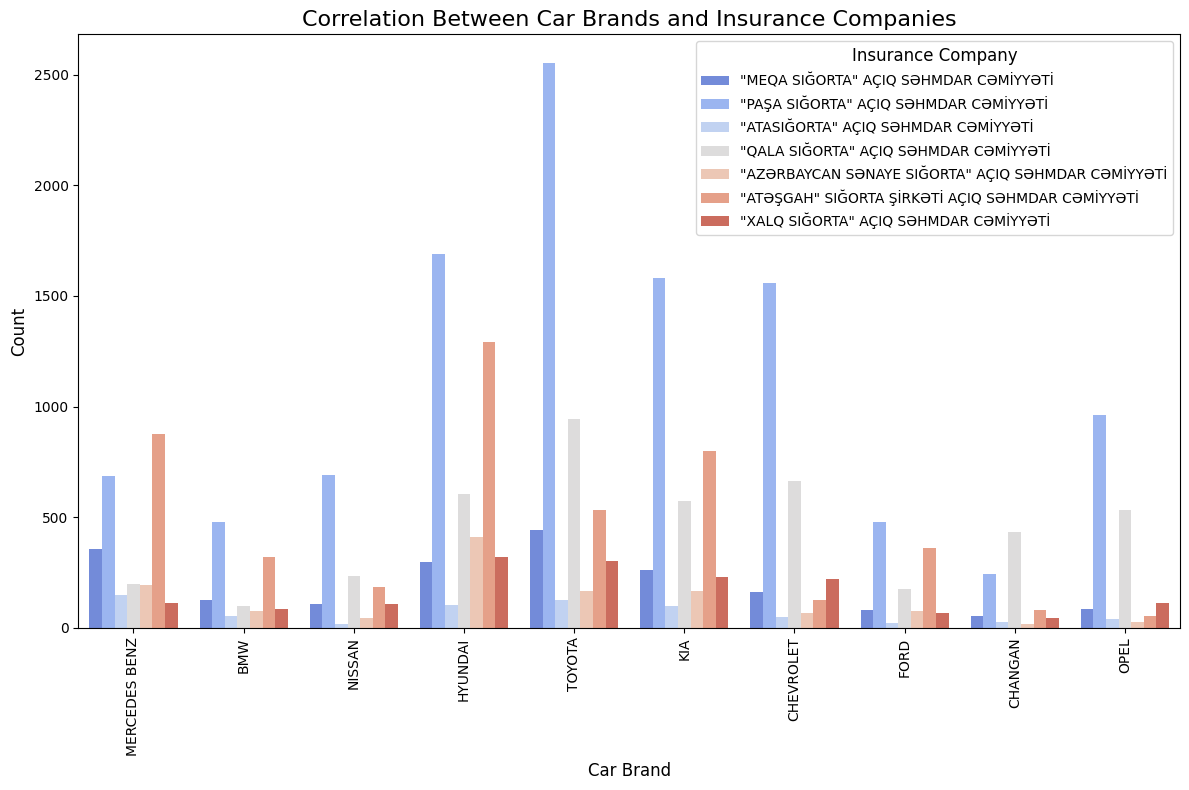

In [9]:
# 9. Chart 7: Correlation Between Insurance Companies and Car Brands

plt.figure(figsize=(12, 8))

# Filter rows where both "Marka" and "InsuranceCompany" are not null
filtered_df = df[df["Marka"].notnull() & df["Organization"].notnull()]

# Get top N car brands to reduce clutter
top_n_brands = filtered_df["Marka"].value_counts().head(10).index
filtered_df_top = filtered_df[filtered_df["Marka"].isin(top_n_brands)]

# Plot the correlation
sns.countplot(data=filtered_df_top, x="Marka", hue="Organization", palette="coolwarm")
plt.title("Correlation Between Car Brands and Insurance Companies", fontsize=16)
plt.xlabel("Car Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Insurance Company", title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

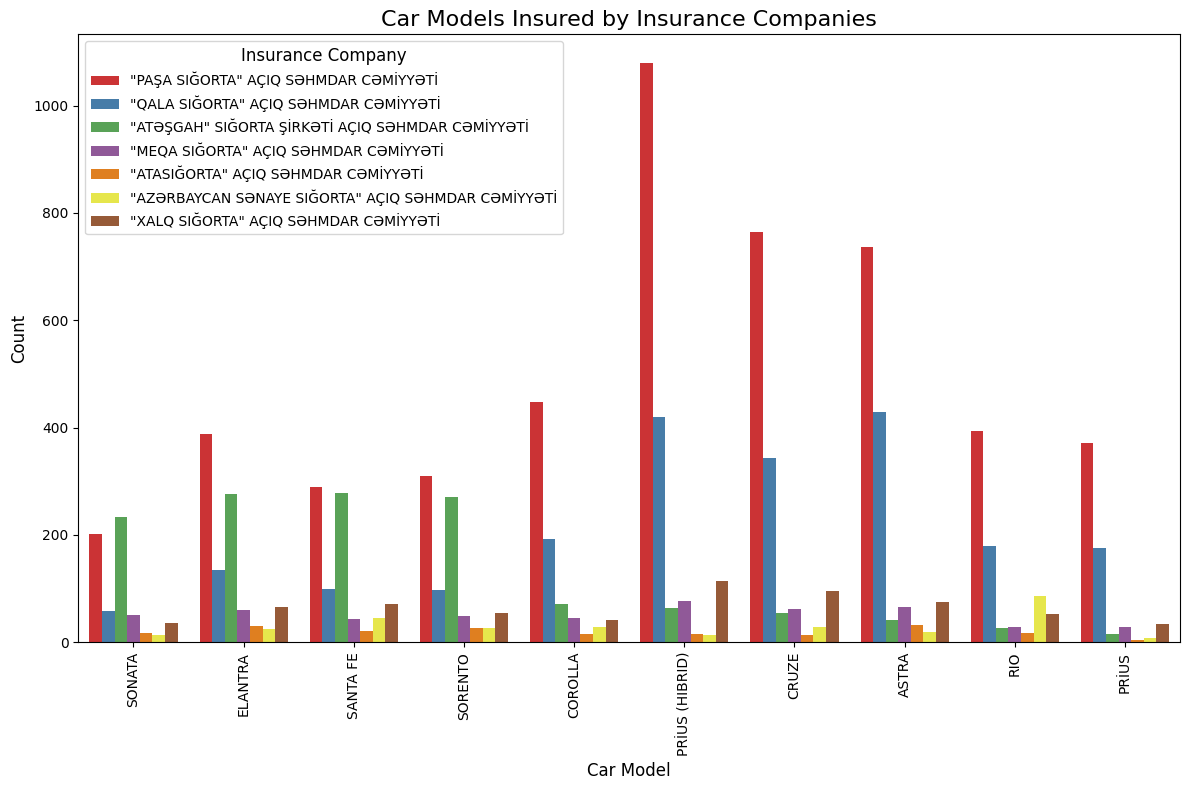

In [10]:
# 10. Chart 8: Car Model Distribution by Insurance Company

plt.figure(figsize=(12, 8))

# Filter rows where both "Model" and "Organization" are not null
filtered_df = df[df["Model"].notnull() & df["Organization"].notnull()]

# Get top N car models to reduce clutter
top_n_models = filtered_df["Model"].value_counts().head(10).index
filtered_df_top = filtered_df[filtered_df["Model"].isin(top_n_models)]

# Plot the correlation
sns.countplot(data=filtered_df_top, x="Model", hue="Organization", palette="Set1")
plt.title("Car Models Insured by Insurance Companies", fontsize=16)
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Insurance Company", title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

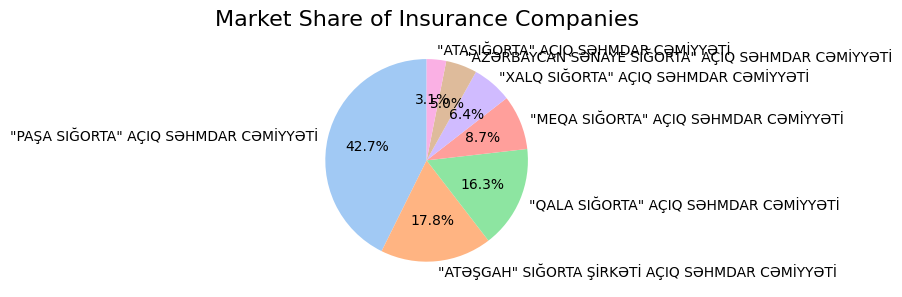

In [11]:
# 11. Chart 9: Market Share of Insurance Companies

plt.figure(figsize=(8, 8))

# Count occurrences of each insurance company
company_counts = df["Organization"].value_counts()

# Plot the pie chart
plt.pie(company_counts, labels=company_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Market Share of Insurance Companies", fontsize=16)
plt.tight_layout()
plt.show()